In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cluster, mixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("./clustering_R3.csv")

In [3]:
data.head(5)

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


In [4]:
# Scaling data
data = pd.DataFrame(StandardScaler().fit_transform(data), columns=["X1", "X2", "X3"])

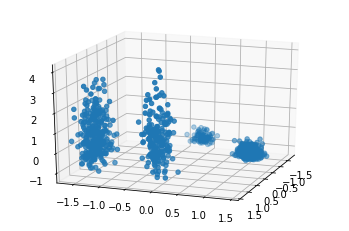

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X1, data.X2, data.X3, zdir='X3')
ax.view_init(elev=20, azim=20)
plt.show()

Based on visual assesment, data can be divided into 4 well separated clusters.

In [6]:
def create_clustering_algorithms(n_clusters):

    two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)

    ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

    average_linkage = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage="average")

    birch = cluster.Birch(n_clusters=n_clusters)

    gmm = mixture.GaussianMixture(n_components=n_clusters)

    clustering_algorithms = (('MiniBatchKMeans', two_means),
                             ('Ward', ward),
                             ('AgglomerativeClustering', average_linkage),
                             ('GaussianMixture', gmm))

    return clustering_algorithms

In [7]:
algorithms_names = [
    'MiniBatchKMeans', 'Ward', 'AgglomerativeClustering',
    'GaussianMixture'
]

In [8]:
silhouette_scores = pd.DataFrame(index=range(2, 15), columns=algorithms_names)

davies_bouldin_scores = pd.DataFrame(index=range(2, 15), columns=algorithms_names)

calinski_harabasz_scores = pd.DataFrame(index=range(2, 15), columns=algorithms_names)

In [9]:
# Calculating metrics
for n_clusters in range(2, 15):

    clustering_algorithms = create_clustering_algorithms(n_clusters)

    for name, algorithm in clustering_algorithms:

        algorithm.fit(data)

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(data)

        db_score = davies_bouldin_score(data, y_pred)
        ch_score = calinski_harabasz_score(data, y_pred)
        s_score = silhouette_score(data, y_pred)

        davies_bouldin_scores.loc[n_clusters, name] = db_score
        calinski_harabasz_scores.loc[n_clusters, name] = ch_score
        silhouette_scores.loc[n_clusters, name] = s_score

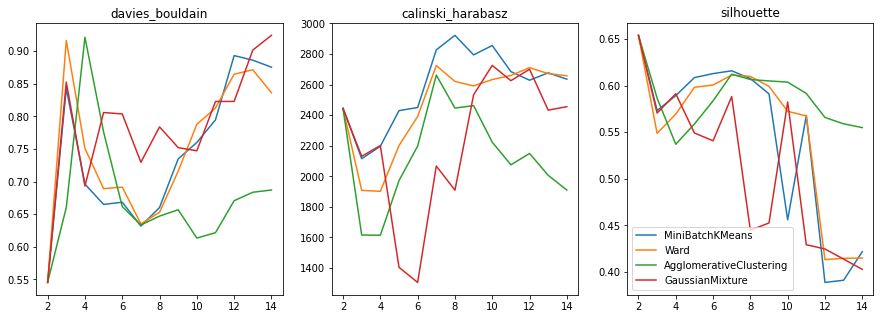

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

davies_bouldin_scores.plot(ax=axes[0], legend=None, title='davies_bouldain')

calinski_harabasz_scores.plot(ax=axes[1], legend=None, title='calinski_harabasz')

silhouette_scores.plot(ax=axes[2], title='silhouette');

 **Silhouette Coefficient** takes into account two values: the mean distance between a sample and all other points in the same class and the mean distance between a sample and all other points in the next nearest cluster.
 The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.<br>
**Calinski-Harabasz Index** is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters. The score is higher when clusters are dense and well separated. <br>
**Davies-Bouldin Index** signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.
Zero is the lowest possible score. Values closer to zero indicate a better partition.

For Davies-Bouldin Index best (smallest) values are achieved for 2 clusters, 
for Calinski-Harabasz Index best (highest) values are achieved for 6-8 clusters and for silhoutette score best values are achieved for 2 clusters.
There is no consensus in regards to optimal number of clusters.

In [11]:
def plot_clustering_results(n_clusters):

    clustering_algorithms = create_clustering_algorithms(n_clusters)

    plot_num = 1

    plt.figure(figsize=(16, 4))

    for name, algorithm in clustering_algorithms:

        algorithm.fit(data)

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(data)

        plt.subplot(1, len(clustering_algorithms), plot_num)

        plt.scatter(data.X1, data.X2, c=y_pred, s=30, cmap='viridis')
        plt.title(name)

        plot_num += 1

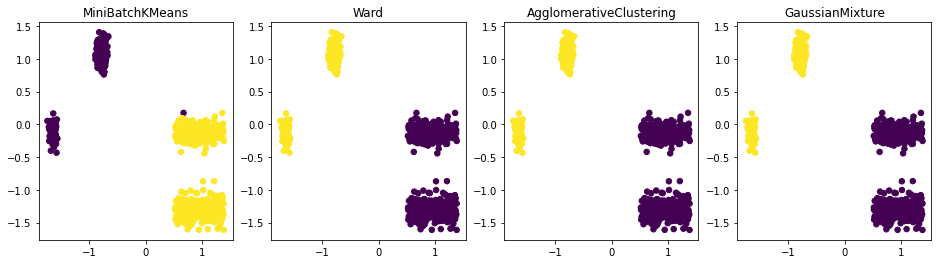

In [12]:
plot_clustering_results(2)

Dividing data into only two clusters shows that all algorithms joined pairs of well separated clusters together.

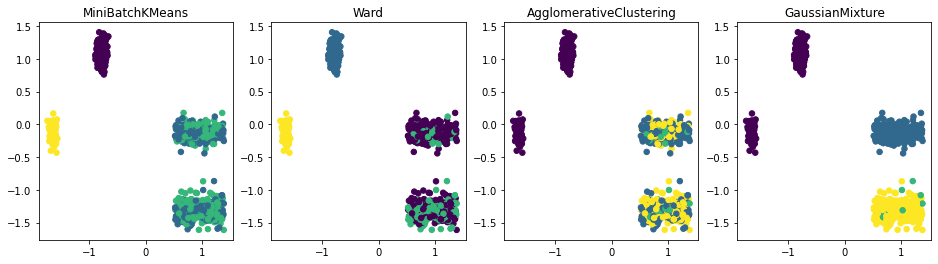

In [13]:
plot_clustering_results(4)

Dividing data into 4 clusters shows that two smaller clusters are easily separable, but all algorithms mixed up observations that clearly belong to other two well separated clusters.